# 주유소 찾기

#### 셀레니움 크롤링은 윈도우 주피터에서

In [1]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from datetime import datetime
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

In [34]:
# Chrome 옵션 설정
options = Options()
options.binary_location =  ".\\chrome-win64\\chrome.exe"
options.add_argument("--no-sandbox") # sandbox 설정
options.add_argument("--disable-dev-shm-usage") # 공유메모리 설정
options.add_argument("--window-size=1920,1080") # 화면크기설정 , 반응형 웹 대비
# options.add_argument("--disable-gpu") # GPU 비활성화

# ChromeDriver 설정
service = Service("chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.opinet.co.kr/user/main/mainView.do")
print(driver.title)
time.sleep(3)

# 요소찾기
hover_element = driver.find_element(By.CSS_SELECTOR, "#header > div > ul > li:nth-child(1) > a")
menu_option = driver.find_element(By.CSS_SELECTOR, "#header > div > ul > li:nth-child(1) > ul > li:nth-child(1) > a > span")

# 마우스 호버 엑션
actions = ActionChains(driver)
actions.move_to_element(hover_element).perform()
print("싼 주유소 찾기")

# 약간의 시간을 기다린 후 클릭
time.sleep(1)
menu_option.click()
time.sleep(2)
print("지역별")

# 입력창 선택 후 검색
driver.find_element(By.CSS_SELECTOR,"#SIDO_NM0 > option:nth-child(3)").click()
print("부산검색")
time.sleep(2)

# 반복문 돌리기 (예: 첫 옵션은 '전체'이므로 [1:]부터 시작)
for i in range(1, len(Select(driver.find_element(By.ID, "SIGUNGU_NM0")).options)):
    # '시/군/구' 선택 박스 요소 찾기
    sigungu_select = Select(driver.find_element(By.ID, "SIGUNGU_NM0"))
    option_text = sigungu_select.options[i].text
    
    sigungu_select.select_by_visible_text(option_text)
    print(f">>> {option_text} 선택")
    time.sleep(2)

    driver.find_element(By.CSS_SELECTOR,"#templ_list0 > div:nth-child(7) > div > a").click()
    print(f"{option_text} 저장")
    time.sleep(2)
# html = driver.page_source
# # print(html) 
driver.quit()

싼 주유소 찾기 오피넷
싼 주유소 찾기
지역별
부산검색
>>> 강서구 선택
강서구 저장
>>> 금정구 선택
금정구 저장
>>> 기장군 선택
기장군 저장
>>> 남구 선택
남구 저장
>>> 동구 선택
동구 저장
>>> 동래구 선택
동래구 저장
>>> 부산진구 선택
부산진구 저장
>>> 북구 선택
북구 저장
>>> 사상구 선택
사상구 저장
>>> 사하구 선택
사하구 저장
>>> 서구 선택
서구 저장
>>> 수영구 선택
수영구 저장
>>> 연제구 선택
연제구 저장
>>> 영도구 선택
영도구 저장
>>> 중구 선택
중구 저장
>>> 해운대구 선택
해운대구 저장


#### hdfs는 도커 주피터에서

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import numpy as np
import seaborn as sns

from hdfs import InsecureClient

Text(0.2, 0.4, '한글')

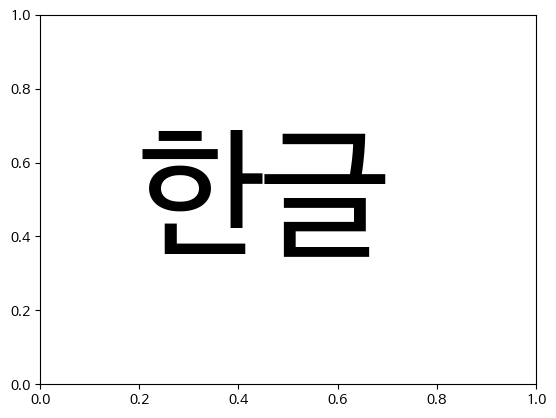

In [6]:
from matplotlib import rc

plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

In [7]:
# !pip install xlrd

In [8]:
# from io import BytesIO
# import os

# hdfs = InsecureClient("http://namenode:9870", user="hadoop")
# paths = ["지역_위치별(주유소).xls", "지역_위치별(주유소) (1).xls"]
# datas = []

# for path in paths:
#     with hdfs.read(path) as reader:
#         content = reader.read()
#         excel_file = BytesIO(content)
#         df = pd.read_excel(excel_file)
#         datas.append(df)

# # 예시: 각 파일을 CSV로 저장
# for i, df in enumerate(datas):
#     csv_filename = f"converted_{i+1}.csv"
#     df.to_csv(csv_filename, index=False, encoding="utf-8-sig")
#     print(f"✅ 저장됨: {csv_filename}")


In [9]:
from io import BytesIO

# HDFS 클라이언트 연결
hdfs = InsecureClient("http://namenode:9870", user="hadoop")

# 파일 목록
paths = ["지역_위치별(주유소).xls", 
         "지역_위치별(주유소) (1).xls", 
         "지역_위치별(주유소) (2).xls",
         "지역_위치별(주유소) (3).xls",
         "지역_위치별(주유소) (4).xls",
         "지역_위치별(주유소) (5).xls",
         "지역_위치별(주유소) (6).xls",
         "지역_위치별(주유소) (7).xls",
         "지역_위치별(주유소) (8).xls",
         "지역_위치별(주유소) (9).xls",
         "지역_위치별(주유소) (10).xls",
         "지역_위치별(주유소) (11).xls",
         "지역_위치별(주유소) (12).xls",
         "지역_위치별(주유소) (13).xls",
         "지역_위치별(주유소) (14).xls",
         "지역_위치별(주유소) (15).xls",
         "지역_위치별(주유소) (15).xls"]

# 데이터프레임들을 저장할 리스트
df_list = []

# 엑셀 파일 하나씩 읽어서 리스트에 저장
for path in paths:
    with hdfs.read(path) as reader:
        content = reader.read()
        excel_file = BytesIO(content)
        df = pd.read_excel(excel_file, skiprows=2)
        df_list.append(df)

# 하나로 합치기 (세로로 붙이기)
combined_df = pd.concat(df_list, ignore_index=True)
combined_df

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,해안주유소,부산 강서구 낙동남로 432,SK에너지,070-8894-3569,Y,-,1549,1399,-
1,부산광역시,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),S-OIL,051-972-5104,Y,-,1549,1409,-
2,부산광역시,은마석유 경기장주유소,부산 강서구 낙동북로 364,GS칼텍스,051-971-7956,Y,1898,1557,1417,1300
3,부산광역시,동방석유㈜직영 대저주유소,부산 강서구 낙동북로 209 (대저1동),SK에너지,051-971-2135,Y,-,1557,1417,-
4,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1557,1417,-
...,...,...,...,...,...,...,...,...,...,...
373,부산광역시,해운대주유소,부산 해운대구 좌동순환로 375,S-OIL,051-747-2526,Y,-,1633,1513,-
374,부산광역시,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,SK에너지,051-784-2999,Y,-,1649,1549,-
375,부산광역시,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),HD현대오일뱅크,051-704-5189,N,2032,1649,1539,-
376,부산광역시,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,051-741-7030,N,1898,1698,1598,-


In [10]:
combined_df.to_csv("통합_주유소.csv", index=False, encoding="utf-8-sig")

In [11]:
combined_df = combined_df[['상호', '주소', '상표', '고급휘발유', '휘발유', '경유', '실내등유']]
combined_df

,상호,주소,상표,고급휘발유,휘발유,경유,실내등유
0,해안주유소,부산 강서구 낙동남로 432,SK에너지,-,1549,1399,-
1,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),S-OIL,-,1549,1409,-
2,은마석유 경기장주유소,부산 강서구 낙동북로 364,GS칼텍스,1898,1557,1417,1300
3,동방석유㈜직영 대저주유소,부산 강서구 낙동북로 209 (대저1동),SK에너지,-,1557,1417,-
4,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,-,1557,1417,-
...,...,...,...,...,...,...,...
373,해운대주유소,부산 해운대구 좌동순환로 375,S-OIL,-,1633,1513,-
374,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,SK에너지,-,1649,1549,-
375,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),HD현대오일뱅크,2032,1649,1539,-
376,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,1898,1698,1598,-


In [12]:
combined_df['주소(구)'] = [a.split(" ")[1] for a in combined_df['주소']]
combined_df

/tmp/ipykernel_44/2255176470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['주소(구)'] = [a.split(" ")[1] for a in combined_df['주소']]


,상호,주소,상표,고급휘발유,휘발유,경유,실내등유,주소(구)
0,해안주유소,부산 강서구 낙동남로 432,SK에너지,-,1549,1399,-,강서구
1,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),S-OIL,-,1549,1409,-,강서구
2,은마석유 경기장주유소,부산 강서구 낙동북로 364,GS칼텍스,1898,1557,1417,1300,강서구
3,동방석유㈜직영 대저주유소,부산 강서구 낙동북로 209 (대저1동),SK에너지,-,1557,1417,-,강서구
4,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,-,1557,1417,-,강서구
...,...,...,...,...,...,...,...,...
373,해운대주유소,부산 해운대구 좌동순환로 375,S-OIL,-,1633,1513,-,해운대구
374,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,SK에너지,-,1649,1549,-,해운대구
375,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),HD현대오일뱅크,2032,1649,1539,-,해운대구
376,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,1898,1698,1598,-,해운대구


In [20]:
import folium

user = "hadoop"
host = "http://namenode:9870"
path = "/user/hadoop/" 
filename = "주유소_위도경도_기름값.csv"
fullpath = path + filename
hdfs = InsecureClient(host, user)
with hdfs.read(fullpath, encoding='UTF-8') as reader:
    gas_data = pd.read_csv(reader)
gas_data

,주소,Latitude,Longitude,고급휘발유,휘발유,경유,실내등유
0,부산 강서구 낙동남로 432,35.111787,128.867467,-,1549,1399,-
1,부산 강서구 낙동남로 127 (송정동),35.101886,128.836964,-,1549,1409,-
2,부산 강서구 낙동북로 364,35.211911,128.968054,1898,1557,1417,1300
3,부산 강서구 낙동북로 209 (대저1동),35.214206,128.951693,-,1557,1417,-
4,부산 강서구 낙동북로 142,35.215329,128.944364,-,1557,1417,-
...,...,...,...,...,...,...,...
373,부산 해운대구 좌동순환로 375,35.163203,129.179501,-,1633,1513,-
374,부산 해운대구 수영강변대로 276,35.183528,129.119120,-,1649,1549,-
375,부산 해운대구 양운로 107 (좌동),35.172305,129.173541,2032,1649,1539,-
376,부산 해운대구 해운대해변로 44 (우동),35.163077,129.138033,1898,1698,1598,-


In [52]:
gas_data['휘발유'] = gas_data['휘발유'].replace('-',0).fillna(0).astype(int)
gas_data.head()

,주소,Latitude,Longitude,고급휘발유,휘발유,경유,실내등유
0,부산 강서구 낙동남로 432,35.111787,128.867467,0,1549,1399,0
1,부산 강서구 낙동남로 127 (송정동),35.101886,128.836964,0,1549,1409,0
2,부산 강서구 낙동북로 364,35.211911,128.968054,1898,1557,1417,1300
3,부산 강서구 낙동북로 209 (대저1동),35.214206,128.951693,0,1557,1417,0
4,부산 강서구 낙동북로 142,35.215329,128.944364,0,1557,1417,0


In [53]:
filtered = gas_data[gas_data['휘발유'] > 0]

top5 = filtered.sort_values(by='휘발유', ascending=False).head(5)  # 비싼 곳
bottom5 = filtered.sort_values(by='휘발유').head(5)               # 싼 곳

m = folium.Map(location=[35.1796, 129.0756], zoom_start=12)

def add_markers(df, color, label):
    for _, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"[{label}] 휘발유: {row['휘발유']}원",
            tooltip=f"{label}",
            icon=folium.Icon(color=color, icon='tint', prefix='fa')
        ).add_to(m)

add_markers(bottom5, 'blue', '휘발유 싼 곳')
add_markers(top5, 'red', '휘발유 비싼 곳')

m